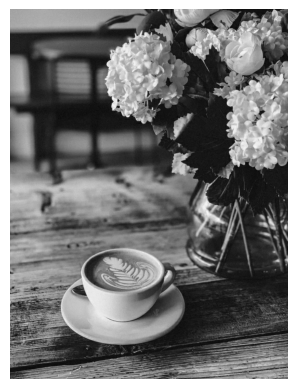

(600,)


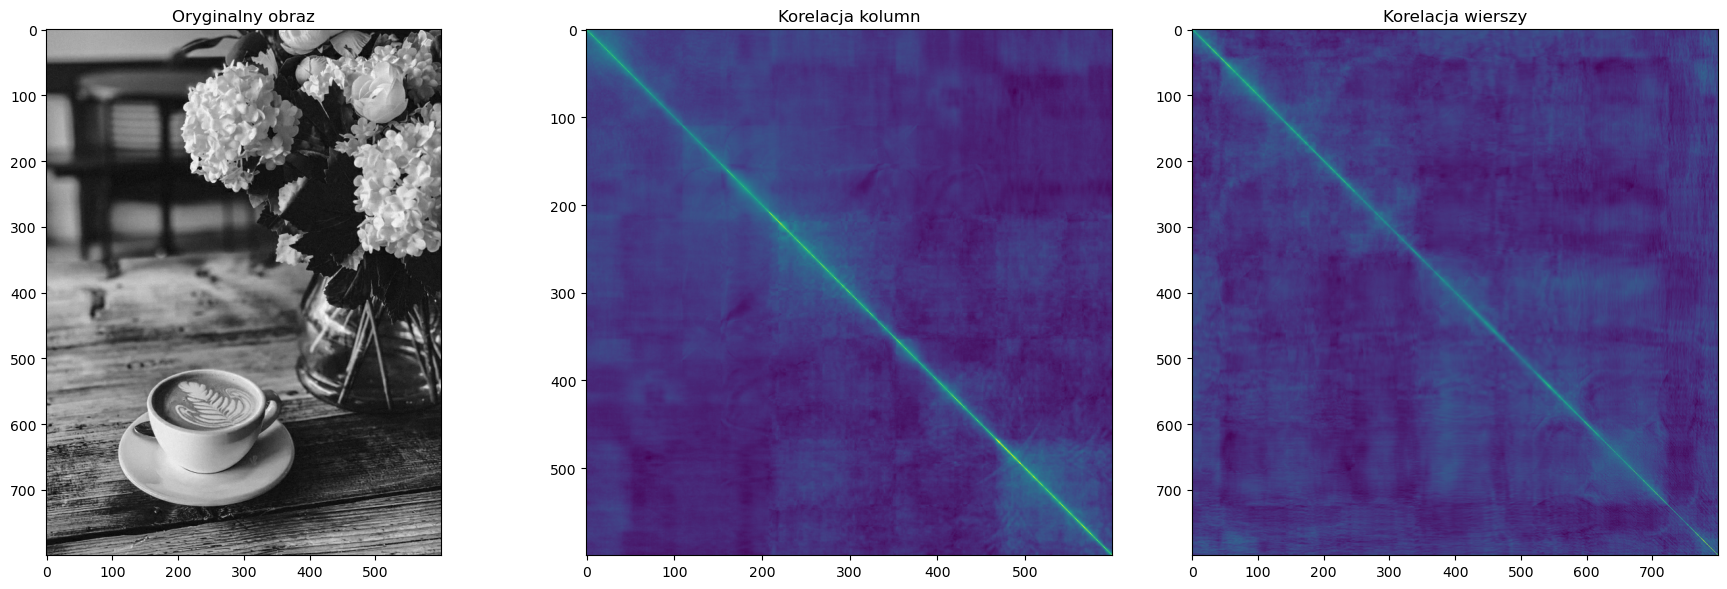

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 1. Wczytanie obrazu i konwersja na odcień szarości (macierz X)
A = imread('7.webp')
X = np.mean(A,-1) # convert RGB to grayscale

#img = plt.imshow(256-X)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# 2. Wykonanie rozkładu SVD
# U, s, Vh = np.linalg.svd(X, full_matrices=False)
# Sigma_sq = np.diag(s**2)

U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

# 3. Obliczenie macierzy korelacji przy użyciu składników SVD
# Korelacja kolumn: V * Sigma^2 * V^T
corr_cols = VT.T @ S @ VT

# Korelacja wierszy: U * Sigma^2 * U^T
corr_rows = U @ S @ U.T

# 4. Wizualizacja
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(X, cmap='gray')
ax[0].set_title("Oryginalny obraz")

ax[1].imshow(corr_cols)
ax[1].set_title("Korelacja kolumn")

ax[2].imshow(corr_rows)
ax[2].set_title("Korelacja wierszy")

plt.tight_layout()
plt.show()